In [854]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm as tq
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

df_cleaned = pd.read_csv("Cleaned.csv")

df_cleaned


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Latitude,Longitude
0,2,66,0,0,0,1,0,1,0,-22.551277,-47.907236
1,1,3,0,0,0,0,0,0,1,-22.880764,-43.493197
2,2,51,0,1,0,0,0,1,1,-20.312347,-40.325407
3,2,33,0,0,0,0,0,0,1,-1.462879,-48.440286
4,2,54,0,0,0,0,0,1,1,-20.257984,-40.297927
...,...,...,...,...,...,...,...,...,...,...,...
120,1,7,0,0,0,0,0,0,1,-20.298286,-40.294665
121,2,47,0,0,0,0,0,0,0,-20.315470,-40.353417
122,1,69,0,0,0,0,0,0,1,-21.574299,-45.445198
123,2,45,0,0,0,0,0,0,1,-29.826768,-50.517489


In [855]:
df_cleaned = df_cleaned.drop(columns="Handcap")

In [856]:
series = df_cleaned["Alcoholism"]

df_Alcoholism = series.to_frame()

In [857]:
df_cleaned

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Showed_up,Latitude,Longitude
0,2,66,0,0,0,1,1,0,-22.551277,-47.907236
1,1,3,0,0,0,0,0,1,-22.880764,-43.493197
2,2,51,0,1,0,0,1,1,-20.312347,-40.325407
3,2,33,0,0,0,0,0,1,-1.462879,-48.440286
4,2,54,0,0,0,0,1,1,-20.257984,-40.297927
...,...,...,...,...,...,...,...,...,...,...
120,1,7,0,0,0,0,0,1,-20.298286,-40.294665
121,2,47,0,0,0,0,0,0,-20.315470,-40.353417
122,1,69,0,0,0,0,0,1,-21.574299,-45.445198
123,2,45,0,0,0,0,0,1,-29.826768,-50.517489


In [858]:
df_cleaned["Alcoholism"].value_counts()

Alcoholism
0    123
1      2
Name: count, dtype: int64

In [859]:
X = df_cleaned.drop("Alcoholism", axis = 1)
y = df_cleaned["Alcoholism"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [860]:
print(y_train.value_counts())

Alcoholism
0    86
1     1
Name: count, dtype: int64


In [861]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [862]:
print(pd.Series(y_resampled.value_counts()))

Alcoholism
0    86
1    86
Name: count, dtype: int64


In [863]:
df["Alcoholism"].value_counts()

Alcoholism
0    123
1      2
Name: count, dtype: int64

In [864]:
print(type(df_cleaned))

<class 'pandas.core.frame.DataFrame'>


In [865]:
X_resampled_df = pd.DataFrame(X_resampled, columns = X_train.columns)
y_resampled_df = pd.Series(y_resampled, name = "Alcoholism")

resampled_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [866]:
def figures(compare):
    plt.figure(figsize=(10, 6))
    sns.countplot(x ='Alcoholism', hue= compare, data=resampled_data)
    plt.title(f'Alcoholism by {compare}')
    plt.xlabel('Alcoholism')
    plt.ylabel('Count')
    plt.show()

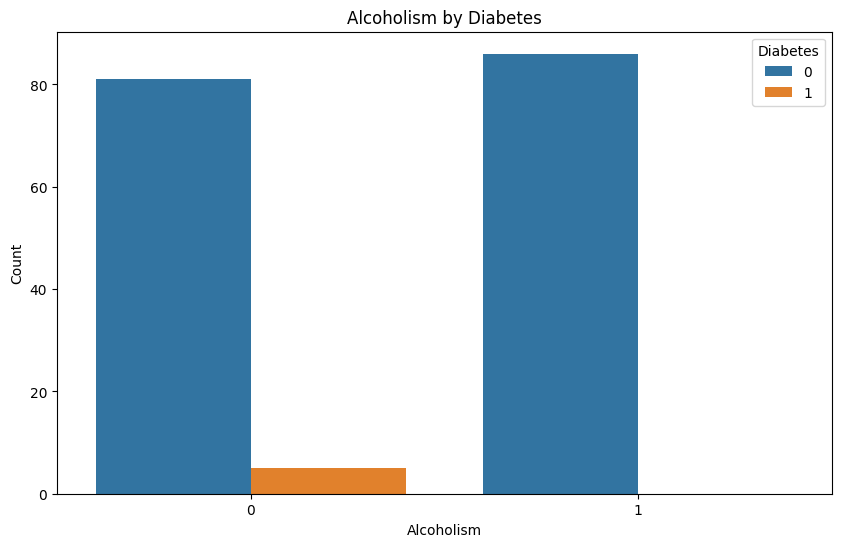

In [867]:
figures("Diabetes")

In [868]:
#1 Being if you posses Diabetes and or Alcoholism while 0 means you do not

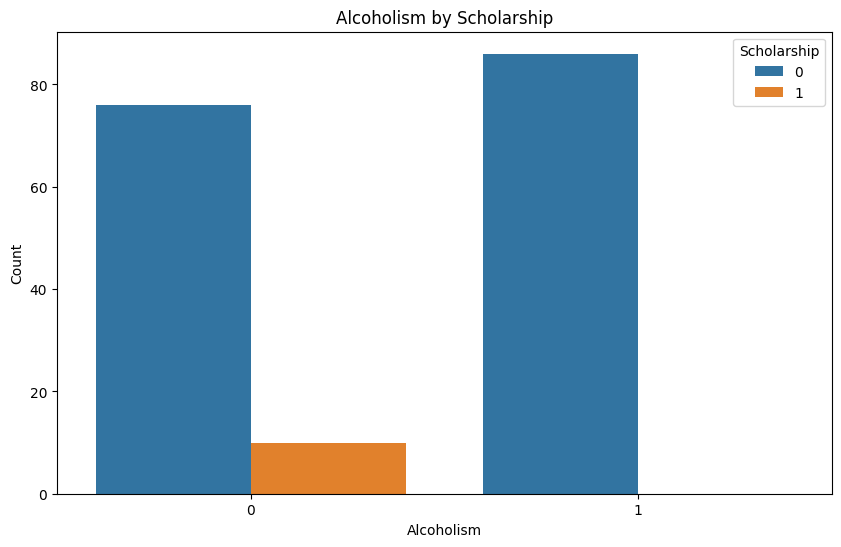

In [869]:
figures("Scholarship")

In [870]:
#1 Being if you posses Scholarship and or Alcoholism while 0 means you do not

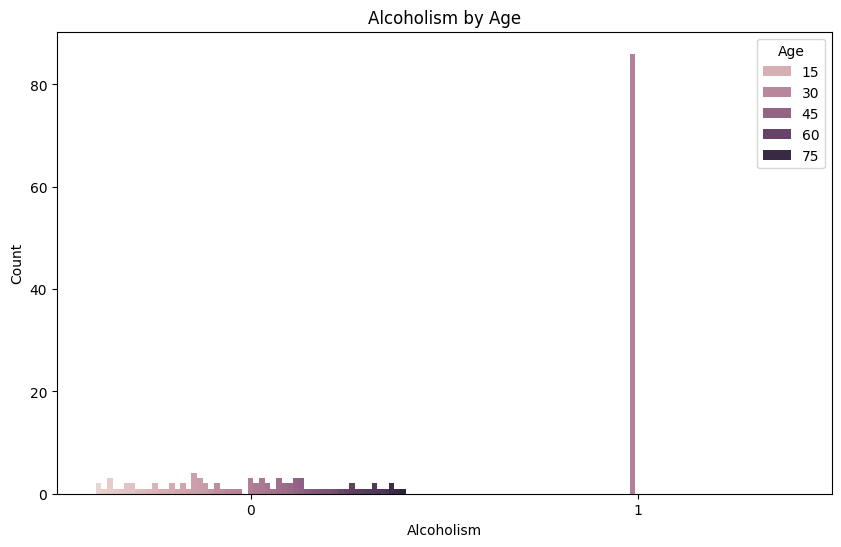

In [887]:
figures("Age")

In [871]:
colors = resampled_data["Alcoholism"].apply(lambda x: "red" if x == 1 else "blue")
def scatterplot(x1, x2):
    plt.figure(figsize = (x1,x2))
    plt.scatter(resampled_data["Longitude"], resampled_data["Latitude"], c = colors)
    plt.title("Alcoholism by Location")
    plt.xlabel("Longitutde", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.grid(True)
    plt.show()

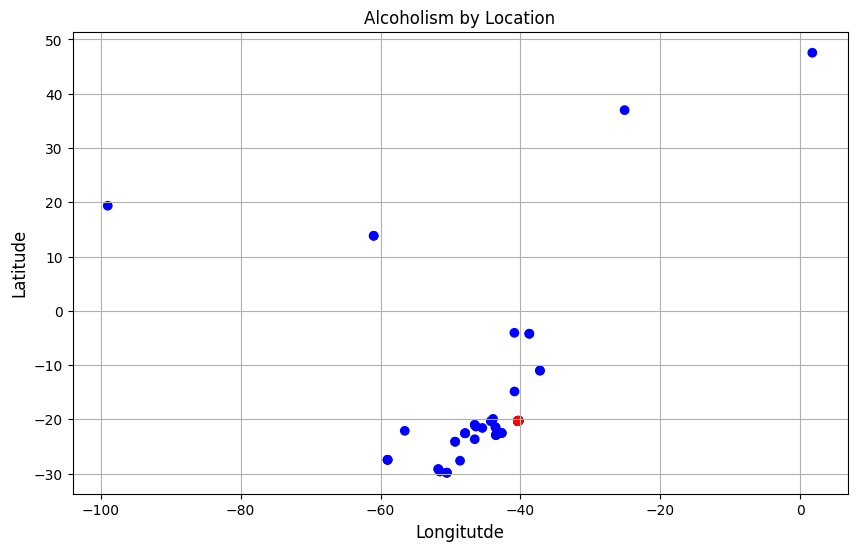

In [ ]:
scatterplot(10, 6)

In [ ]:
df_cleaned.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Showed_up,Latitude,Longitude
Gender,1.000000,0.191781,-0.009315,0.136903,0.092492,-0.049205,0.091800,0.042780,-0.003378,0.117898
Age,0.191781,1.000000,-0.087384,0.524319,0.321438,0.067190,0.101605,0.170957,-0.038075,-0.082021
Scholarship,-0.009315,-0.087384,1.000000,-0.007987,-0.079371,-0.041554,-0.043609,-0.020322,-0.013217,-0.046260
Hipertension,0.136903,0.524319,-0.007987,1.000000,0.252904,-0.058933,0.006166,0.147532,-0.097685,-0.037068
Diabetes,0.092492,0.321438,-0.079371,0.252904,1.000000,-0.031058,-0.088918,0.130858,-0.035790,-0.009443
Alcoholism,-0.049205,0.067190,-0.041554,-0.058933,-0.031058,1.000000,0.051743,-0.084414,-0.035481,-0.020284
SMS_received,0.091800,0.101605,-0.043609,0.006166,-0.088918,0.051743,1.000000,-0.052349,0.050276,-0.013695
Showed_up,0.042780,0.170957,-0.020322,0.147532,0.130858,-0.084414,-0.052349,1.000000,-0.021151,0.082607
Latitude,-0.003378,-0.038075,-0.013217,-0.097685,-0.035790,-0.035481,0.050276,-0.021151,1.000000,0.358503
Longitude,0.117898,-0.082021,-0.046260,-0.037068,-0.009443,-0.020284,-0.013695,0.082607,0.358503,1.000000


<Axes: >

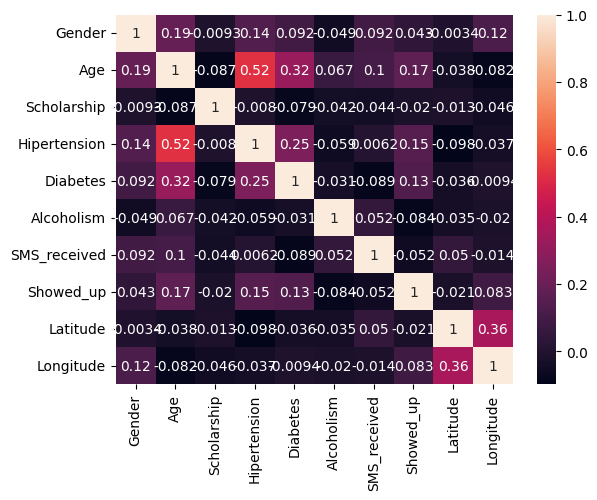

In [ ]:
sns.heatmap(df_cleaned.corr(), annot=True)

Because Alcoholism here has many relationships that is close to 0 we can see that Alcoholism has almost no correlation with any of these other columns like Scholarship, Diabetes, and where you are in the world. Based on the sample that was able to be taken from the dataset

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_resampled)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

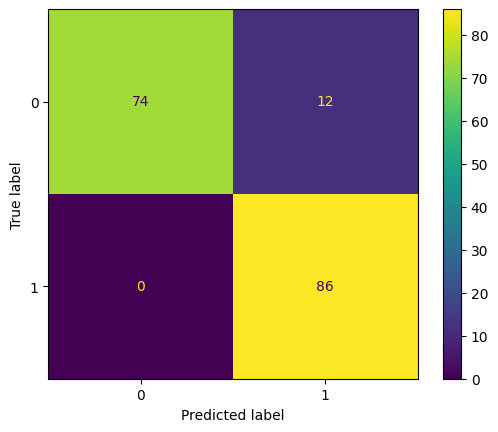

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_resampled, y_resampled)

In [ ]:
def calculate(calc_type:str, tp: int, tn: int, fp: int, fn: int) -> float:

    if calc_type == "precision":
        value = tp / (tp + fp)
        return value
    elif calc_type == "recall":
        value = tp / (tp + fn)
        return value
    elif calc_type == "accuracy":
        value = (tp + tn)/(tp + tn + fp + fn)
        return value
    else:
        error_msg = "You messed up :)"
        return error_msg

Precision

In [ ]:
calculate("precision",74,0,86,12)


0.4625

Recall

In [ ]:
calculate("recall",74,0,86,12)

0.8604651162790697

Accuracy

In [ ]:
calculate("accuracy",74,0,86,12)

0.43023255813953487

In [ ]:
x = df_cleaned.drop("Alcoholism", axis = 1)
Y = df_cleaned["Alcoholism"]

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(X_resampled)
x_test = sc.transform(X_resampled)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_resampled)
print(y_pred)
print(type(y_pred))



[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  1.  0.  0.2 0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.
 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6
 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
<class 'numpy.ndarray'>


In [ ]:
print(knn.score(X_resampled, y_resampled))

0.9720930232558139


In [888]:
y_val_pred = model.predict(X_resampled)
print(classification_report(y_resampled, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        86
           1       0.88      1.00      0.93        86

    accuracy                           0.93       172
   macro avg       0.94      0.93      0.93       172
weighted avg       0.94      0.93      0.93       172

